In [7]:
#load the file
import sys
from tkinter import *
from tkinter.filedialog import askopenfilename   

fname = "unassigned"

def openFile():
    global fname
    fname = askopenfilename()
    root.destroy()

if __name__ == '__main__':

    root = Tk()
    Button(root, text='File Open', command = openFile).pack(fill=X)
    mainloop()

    print (fname)

/home/karan/project/1.jpg


In [8]:
from PIL import Image
import pytesseract

im = Image.open(fname)

text = pytesseract.image_to_string(im, lang = 'eng')

print(text)

£02, Congratulations!

 

 

* COE)

You're the 1 Million th
visitor this week!

a but to lose window
1c cur Prize Department


In [1]:
import nltk # Imports the library
#nltk.download() #Download the necessary datasets

In [116]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]
print(len(messages))


5588


In [117]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [118]:
import pandas as pd

In [119]:
messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [120]:
messages.describe()

,label,message
count,5585,5585
unique,2,5181
top,ham,"Sorry, I'll call later"
freq,4825,30


In [121]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      760    665  Please call our customer service representativ...    4

In [122]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

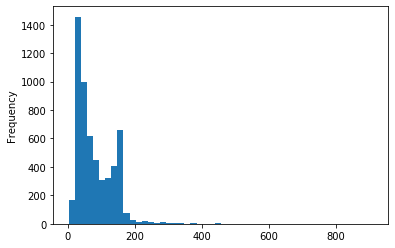

In [124]:
messages['length'].plot(bins=50, kind='hist') 

In [125]:
messages.length.describe()

count    5585.000000
mean       80.533751
std        59.907483
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [126]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb8cb2d390>,
      dtype=object)

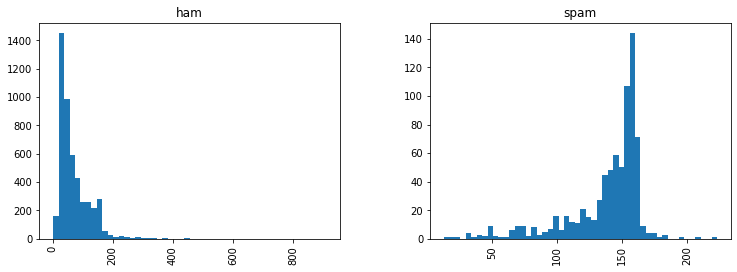

In [127]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

In [128]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [129]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [130]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [131]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [132]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [133]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [134]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [135]:
# Check to make sure its working
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [136]:
# Show original dataframe
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [137]:
from sklearn.feature_extraction.text import CountVectorizer

In [138]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11464


In [139]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [140]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4084)	2
  (0, 4651)	1
  (0, 5283)	1
  (0, 6227)	1
  (0, 6245)	1
  (0, 7212)	1
  (0, 9585)	2
(1, 11464)


In [141]:
print(bow_transformer.get_feature_names()[4073])
print(bow_transformer.get_feature_names()[9570])

Twelve
sat


In [142]:
messages_bow = bow_transformer.transform(messages['message'])

In [143]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5585, 11464)
Amount of Non-Zero occurences:  50708


In [144]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [145]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9585)	0.5385754799886401
  (0, 7212)	0.4388715098215738
  (0, 6245)	0.31870728498711004
  (0, 6227)	0.29953167576567236
  (0, 5283)	0.29729419572223764
  (0, 4651)	0.26620574502067956
  (0, 4084)	0.40839362683438674


In [146]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2823823856765264
8.529406457837013


In [147]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5585, 11464)


In [148]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [149]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


In [150]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'spam' 'spam']


In [151]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       760

    accuracy                           0.98      5585
   macro avg       0.99      0.92      0.95      5585
weighted avg       0.98      0.98      0.98      5585



In [152]:
from sklearn.naive_bayes import MultinomialNB

In [153]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4468 1117 5585


In [154]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [155]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fbb8c61ef80>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [156]:
predictions = pipeline.predict(msg_test)

In [157]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98       990
        spam       0.79      1.00      0.89       127

    accuracy                           0.97      1117
   macro avg       0.90      0.98      0.93      1117
weighted avg       0.98      0.97      0.97      1117



In [184]:
from PIL import Image
import pytesseract

im = Image.open("1.jpg")

text = pytesseract.image_to_string(im, lang = 'eng')

print(text)

£02, Congratulations!

 

 

* COE)

You're the 1 Million th
visitor this week!

a but to lose window
1c cur Prize Department


In [173]:
from PIL import Image, ImageEnhance, ImageFilter
import pytesseract
#path = "3.jpg"
img = Image.open("2.png")
img = img.convert("RGBA")
pix = img.load()
for y in range(img.size[1]):
    for x in range(img.size[0]):
        if pix[x, y][0] < 102 or pix[x, y][1] < 102 or pix[x, y][2] < 102:
            pix[x, y] = (0, 0, 0, 255)
        else:
            pix[x, y] = (255, 255, 255, 255)
#img.save("3.jpg")
text = pytesseract.image_to_string(Image.open("2.png"))
print(text)

eee ete

WINNER!

You have wona

 

4 GB madel halds up to 1,000 songs
More than 8 hrs battery life on 1 charge
Earbud headphones, belt clip, AC adapter

Click Here to Claim Your FREE Apple iPo:

(For part

  

tion in our program.)


In [176]:
pdf = pytesseract.image_to_pdf_or_hocr('1.jpg', extension='pdf')
with open('test.pdf', 'w+b') as f:
    f.write(pdf)

In [181]:
from pdf2image import convert_from_path 
# Path of the pdf 
PDF_file = "test.pdf"
  
''' 
Part #1 : Converting PDF to images 
'''
  
# Store all the pages of the PDF in a variable 
pages = convert_from_path(PDF_file, 500) 
  
# Counter to store images of each page of PDF to image 
image_counter = 1
  
# Iterate through all the pages stored above 
for page in pages: 
  
    # Declaring filename for each page of PDF as JPG 
    # For each page, filename will be: 
    # PDF page 1 -> page_1.jpg 
    # PDF page 2 -> page_2.jpg 
    # PDF page 3 -> page_3.jpg 
    # .... 
    # PDF page n -> page_n.jpg 
    filename = "page_"+str(image_counter)+".jpg"
      
    # Save the image of the page in system 
    page.save(filename, 'JPEG') 
  
    # Increment the counter to update filename 
    image_counter = image_counter + 1

''' 
Part #2 - Recognizing text from the images using OCR 
'''
    
# Variable to get count of total number of pages 
filelimit = image_counter-1
  
# Creating a text file to write the output 
#outfile = "out_text.txt"
  
# Open the file in append mode so that  
# All contents of all images are added to the same file 
#f = open(outfile, "a") 
  
# Iterate from 1 to total number of pages 
for i in range(1, filelimit + 1): 
  
    # Set filename to recognize text from 
    # Again, these files will be: 
    # page_1.jpg 
    # page_2.jpg 
    # .... 
    # page_n.jpg 
    filename = "page_"+str(i)+".jpg"
          
    # Recognize the text as string in image using pytesserct 
    text = str(((pytesseract.image_to_string(Image.open(filename)))))
    print(text)

PHO

Congratulations!

Fe CUETO SY

You're the 1 Million th

visitor this week!

Chick “OK” button below to close window
and contact our Poze Department immediately.


In [182]:
#Image preview
im.show()

In [185]:
print(pipeline.predict([text]))

['spam']


In [ ]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])